In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

/Users/vishalmishra/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/vishalmishra/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
style.use('ggplot')

In [3]:
plt.rc('figure', figsize=(10, 5))

fizsize_with_subplots = (10, 10)

bin_size = 10

In [4]:
df_zip = pd.read_csv('/Volumes/Macdrive2/DataScience/Uptake/zipCodeMarketingCosts.csv')

## Data Preparation

In [5]:
df = pd.read_csv("/Volumes/Macdrive2/DataScience/Uptake/data/train.csv", index_col='id')
#df.head()

/Users/vishalmishra/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.gender.value_counts()

F    97933
M    74618
      5652
U     3284
J      695
A        4
C        4
Name: gender, dtype: int64

In [7]:
gender_type = sorted(df.gender.unique())
genders_mapping =dict(zip(gender_type, range(0,len(gender_type)+1)))
genders_mapping

{' ': 0, 'A': 1, 'C': 2, 'F': 3, 'J': 4, 'M': 5, 'U': 6}

In [8]:
df['Gender_Val'] = df['gender'].map(genders_mapping).astype(int)
df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2,Gender_Val
id,,,,,,,,,,,,,,,,,,,,,
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0,L,3,D,X,X,X,4.0,B,3
1,8601,LIS,2,MI,48504,,,4101,0,,...,0,L,2,F,X,X,X,49.0,B,3
2,9601,AGS,28,WA,99218,,,0,0,,...,0,L,3,E,X,X,X,48.0,B,3
3,9101,NAD,2,NM,88201,B,,5201,0,,...,0,L,1,F,X,X,X,39.0,C,3
4,9201,FRC,0,AL,35603,,,4301,0,,...,0,L,1,G,X,X,X,16.0,C,3


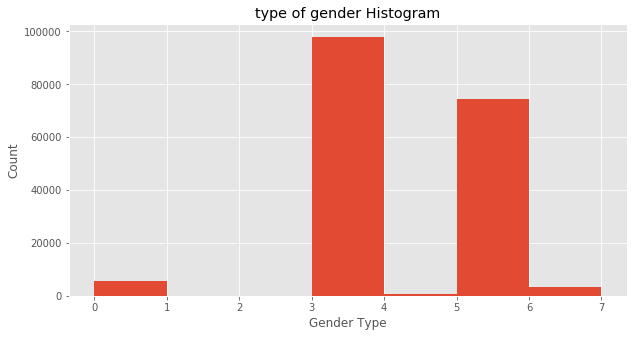

In [9]:
df['Gender_Val'].hist(bins=len(gender_type), range=(0, 7))
plt.title('type of gender Histogram')
plt.xlabel('Gender Type')
plt.ylabel('Count')
plt.show()

In [10]:
df.Gender_Val.value_counts()

3    97933
5    74618
0     5652
6     3284
4      695
2        4
1        4
Name: Gender_Val, dtype: int64

In [11]:
df['zip'] = df['zip'].replace('\-','',regex=True).astype(float)

In [12]:
new_df = df.merge(df_zip, how = 'inner', on = 'zip')

In [13]:
training_df = new_df.loc[:,['zip','cluster','major','pepstrfl','rfa_2f','rfa_2a','marketingCost','responded']]
training_df['pepstrfl'].replace(('X',' '), (1,0), inplace=True)
training_df['major'].replace(('X',' '), (1,0), inplace=True)

In [14]:
training_df['cluster'] = pd.to_numeric(training_df['cluster'], errors='coerce')
training_df = pd.get_dummies(training_df, columns = ['rfa_2a'])
training_df['cluster'].fillna((training_df['cluster'].mean()), inplace=True)

In [15]:
training_df.describe()

,zip,cluster,major,pepstrfl,rfa_2f,marketingCost,responded,rfa_2a_D,rfa_2a_E,rfa_2a_F,rfa_2a_G
count,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000
mean,64259.473270,27.917281,0.003057,0.474356,1.910039,6.777915,0.050766,0.077749,0.226511,0.492486,0.203255
std,23969.472985,14.279578,0.055208,0.499343,1.073082,6.332381,0.219519,0.267776,0.418574,0.499945,0.402422
min,801.000000,1.000000,0.000000,0.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40475.000000,16.000000,0.000000,0.000000,1.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63105.000000,27.917281,0.000000,0.000000,2.000000,3.240000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90007.000000,40.000000,0.000000,1.000000,3.000000,12.490000,0.000000,0.000000,0.000000,1.000000,0.000000
max,99950.000000,53.000000,1.000000,1.000000,4.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
training_df.head()

,zip,cluster,major,pepstrfl,rfa_2f,marketingCost,responded,rfa_2a_D,rfa_2a_E,rfa_2a_F,rfa_2a_G
0,40207.0,23.0,0,0,3,2.11,0,1,0,0,0
1,40207.0,16.0,0,1,3,2.11,0,0,0,1,0
2,40207.0,15.0,0,0,1,2.11,0,0,0,0,1
3,40207.0,13.0,0,0,1,2.11,0,0,0,1,0
4,40207.0,13.0,0,1,1,2.11,0,0,1,0,0


In [17]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (6, 2)

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'RFM')

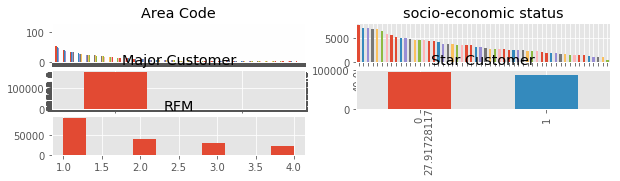

In [18]:
fig.subplots_adjust(hspace=.5)
plt.subplot2grid(fig_dims, (0, 0))
training_df['zip'].value_counts().plot(kind='bar', 
                                         title='Area Code')

plt.subplot2grid(fig_dims, (0, 1))
training_df['cluster'].value_counts().plot(kind='bar', 
                                       title='socio-economic status')

plt.subplot2grid(fig_dims, (1, 0))
training_df['major'].value_counts().plot(kind='bar', 
                                    title='Major Customer')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1, 1))
training_df['pepstrfl'].value_counts().plot(kind='bar', 
                                         title='Star Customer')
plt.subplot2grid(fig_dims, (2, 0))
training_df['rfa_2f'].hist()
plt.title('RFM')


In [19]:
star_xt = pd.crosstab(df['Gender_Val'], training_df['pepstrfl'])
star_xt

pepstrfl,0,1
Gender_Val,,
0,2962,2690
1,2,2
2,3,1
3,51312,46621
4,388,307
5,39356,35262
6,1744,1540


Text(0,0.5,'Star')

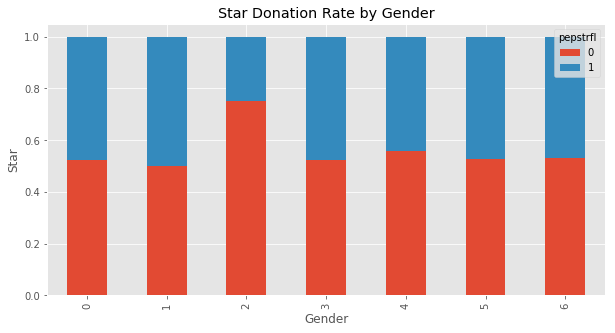

In [20]:
star_xt_pct = star_xt.div(star_xt.sum(1).astype(float), axis=0)
star_xt_pct.plot(kind='bar', stacked=True)
plt.title('Star Donation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Star')

In [21]:
gender_xt = pd.crosstab(df['Gender_Val'], training_df['major'])
gender_xt

major,0,1
Gender_Val,,
0,5634,18
1,4,0
2,4,0
3,97638,295
4,692,3
5,74390,228
6,3271,13


Text(0,0.5,'Major')

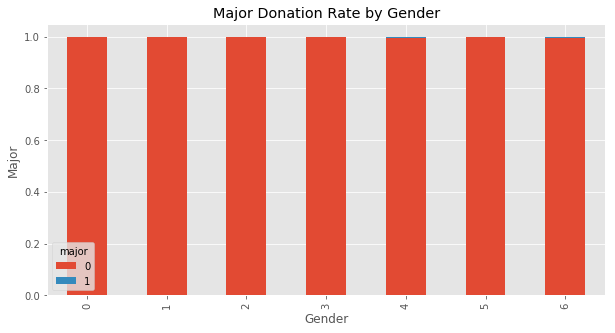

In [22]:
gender_xt_pct = gender_xt.div(gender_xt.sum(1).astype(float), axis=0)
gender_xt_pct.plot(kind='bar', stacked=True)
plt.title('Major Donation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Major')

In [23]:
df[df['age'].isnull()][['Gender_Val','age']].head()

,Gender_Val,age
id,,
2,3,NaN
13,6,NaN
15,0,NaN
17,6,NaN
25,3,NaN


In [24]:
df['AgeFill'] = df['age']

# Populate AgeFill
df['AgeFill'] = df['AgeFill'].groupby([df['Gender_Val']]).apply(lambda x: x.fillna(x.median()))

In [25]:
df.AgeFill.head()

id
0    29.0
1    57.0
2    61.0
3    46.0
4    55.0
Name: AgeFill, dtype: float64

In [27]:
df.age.dtypes

dtype('float64')

In [28]:
len(df[df['AgeFill'].isnull()])

0

In [57]:
Gender_classes = sorted(df['Gender_Val'].unique())
Gender_classes

[0, 1, 2, 3, 4, 5, 6]

In [58]:
df.AgeFill[df.gender == '2']

Series([], Name: AgeFill, dtype: float64)

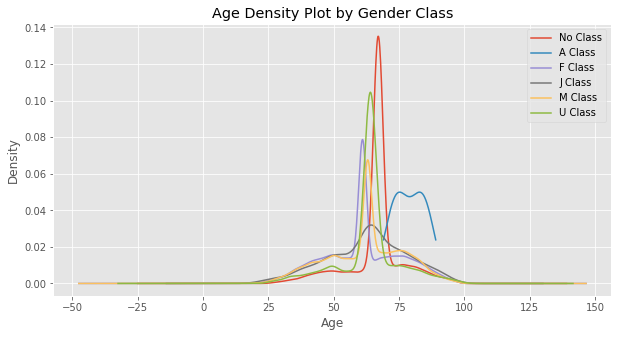

In [59]:
for gclass in Gender_classes:
    if(gclass == 2):
        continue
    df.AgeFill[df.Gender_Val == gclass].plot(kind='kde')
plt.title('Age Density Plot by Gender Class')
plt.xlabel('Age')
plt.legend(('No Class','A Class', 'F Class','J Class','M Class','U Class'), loc='best')


In [ ]:
X_df = training_df.drop('responded', axis=1)
Y_df = training_df['responded']

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
n = StandardScaler()
X_df = pd.DataFrame(n.fit_transform(X_df), columns = [X_df.columns])

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_df,Y_df, test_size=0.2, random_state=0) 

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
cls_lr_cv = LogisticRegressionCV(cv = 10)

cls_lr_cv.fit(X_train,Y_train)
pred_lr_cv = cls_lr_cv.predict(X_test)
cls_lr_cv.score(X_test, Y_test)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cls_dt = DecisionTreeClassifier()
cls_dt.fit(X_train,Y_train)
pred_dt = cls_dt.predict(X_test)
cls_dt.score(X_test,Y_test)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls_rf = RandomForestClassifier(n_estimators = 30)
cls_rf.fit(X_train,Y_train)
pred_rf = cls_rf.predict(X_test)
cls_rf.score(X_test,Y_test)

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

cls_gb = GradientBoostingClassifier()
cls_gb.fit(X_train,Y_train)
pred_gb = cls_gb.predict(X_test)
cls_gb.score(X_test,Y_test)

### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

cls_sv = SVC()
cls_sv.fit(X_train,Y_train)
pred_sv = cls_sv.predict(X_test)
cls_sv.score(X_test,Y_test)

## Testing

In [ ]:
test_df = pd.read_csv("/Volumes/Macdrive2/DataScience/Uptake/data/test.csv", index_col='id')

In [ ]:
test_df['zip'] = test_df['zip'].replace('\-','',regex=True).astype(float)

In [ ]:
test_df = test_df.merge(df_zip, how = 'left', on = 'zip')

In [ ]:
testing_df = test_df.loc[:,['zip','cluster','major','pepstrfl','rfa_2f','rfa_2a','marketingCost']]

In [ ]:
testing_df['pepstrfl'].replace(('X',' '), (1,0), inplace=True)
testing_df['major'].replace(('X',' '), (1,0), inplace=True)

In [ ]:
testing_df['cluster'] = pd.to_numeric(testing_df['cluster'], errors='coerce')
testing_df = pd.get_dummies(testing_df, columns = ['rfa_2a'])

In [ ]:
testing_df['cluster'].fillna((testing_df['cluster'].mean()), inplace=True)

In [ ]:
predicted_test = cls_rf.predict(testing_df)
print(predicted_test.shape)

In [ ]:
final_test_df = pd.read_csv("/Volumes/Macdrive2/DataScience/Uptake/data/test.csv", index_col='id')

In [ ]:
final_test_df['market'] = predicted_test

In [ ]:
final_test_df['market']

In [ ]:
final_test_df.to_csv('test.csv')